In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

import json
import configparser
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [9]:
config = configparser.ConfigParser()
config.read('../config.ini')
path = config['path']['take_home_challenges']

['../config.ini']

## 数据探索

In [10]:
df = pd.read_csv(path+'conversion_project.csv')
df.shape
df.isnull().mean()
df.head()

(316200, 6)

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [13]:
Counter(df['country'])

Counter({'UK': 48450, 'US': 178092, 'China': 76602, 'Germany': 13056})

In [14]:
Counter(df['age'])

Counter({25: 13460,
         23: 12336,
         28: 14341,
         39: 8202,
         30: 14346,
         31: 13692,
         27: 14084,
         29: 14158,
         38: 8970,
         43: 4904,
         24: 12960,
         36: 10779,
         37: 9761,
         33: 12631,
         20: 10156,
         35: 11471,
         17: 7597,
         50: 1356,
         22: 11701,
         18: 8466,
         34: 12108,
         19: 9349,
         42: 5588,
         32: 13507,
         21: 10966,
         48: 2121,
         40: 7148,
         41: 6401,
         26: 13931,
         45: 3634,
         44: 4224,
         49: 1629,
         46: 2994,
         56: 286,
         52: 935,
         54: 520,
         51: 1093,
         47: 2504,
         53: 627,
         60: 94,
         57: 247,
         55: 394,
         59: 127,
         61: 71,
         58: 165,
         62: 59,
         65: 15,
         63: 35,
         66: 9,
         67: 5,
         64: 27,
         68: 5,
         69: 3,
        

In [15]:
Counter(df['new_user'])

Counter({1: 216744, 0: 99456})

In [16]:
Counter(df['source'])

Counter({'Ads': 88740, 'Seo': 155040, 'Direct': 72420})

In [17]:
Counter(df['total_pages_visited'])

Counter({1: 40739,
         5: 36308,
         4: 41046,
         6: 30261,
         2: 43868,
         8: 17522,
         7: 23488,
         3: 43829,
         9: 12157,
         14: 1811,
         10: 8074,
         11: 5394,
         18: 722,
         15: 1325,
         19: 565,
         12: 3615,
         13: 2425,
         21: 296,
         17: 845,
         23: 113,
         16: 1100,
         25: 39,
         26: 17,
         20: 405,
         22: 180,
         24: 46,
         27: 7,
         28: 1,
         29: 2})

(array([5.8235e+04, 6.6771e+04, 7.0044e+04, 6.5720e+04, 3.2243e+04,
        1.5477e+04, 6.1600e+03, 1.2190e+03, 2.8600e+02, 3.7000e+01,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 17. ,  22.3,  27.6,  32.9,  38.2,  43.5,  48.8,  54.1,  59.4,
         64.7,  70. ,  75.3,  80.6,  85.9,  91.2,  96.5, 101.8, 107.1,
        112.4, 117.7, 123. ]),
 <a list of 20 Patch objects>)

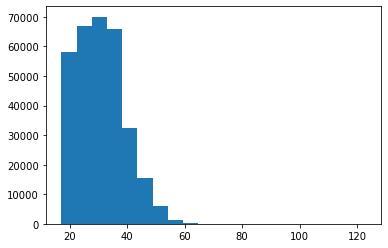

In [18]:
plt.hist(df['age'], bins=20)

## Label编码

In [32]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
df['country2'] = le.fit_transform(df['country'])

In [37]:
Counter(df['country2'])

Counter({2: 48450, 3: 178092, 0: 76602, 1: 13056})

In [38]:
le2 = LabelEncoder()
df['source2'] = le2.fit_transform(df['source'])
Counter(df['source2'])

Counter({0: 88740, 2: 155040, 1: 72420})

## 没有缺失数据，直接lightgbm

In [19]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [39]:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]
X = df[['age','country2','source2','total_pages_visited', 'new_user']]
y = df['converted']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
# 创建、训练模型
gbm = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=-1, learning_rate=0.05, n_estimators=20)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[1]	valid_0's binary_logloss: 0.109091
[2]	valid_0's binary_logloss: 0.099765
[3]	valid_0's binary_logloss: 0.0930672
[4]	valid_0's binary_logloss: 0.0878089
[5]	valid_0's binary_logloss: 0.0834463
[6]	valid_0's binary_logloss: 0.079727
[7]	valid_0's binary_logloss: 0.0764919
[8]	valid_0's binary_logloss: 0.0736482
[9]	valid_0's binary_logloss: 0.0711127
[10]	valid_0's binary_logloss: 0.0688378
[11]	valid_0's binary_logloss: 0.0667766
[12]	valid_0's binary_logloss: 0.0648967
[13]	valid_0's binary_logloss: 0.0631812
[14]	valid_0's binary_logloss: 0.0616113
[15]	valid_0's binary_logloss: 0.0601742
[16]	valid_0's binary_logloss: 0.0588488
[17]	valid_0's binary_logloss: 0.0576266
[18]	valid_0's binary_logloss: 0.0564895
[19]	valid_0's binary_logloss: 0.0554303
[20]	valid_0's binary_logloss: 0.0544465


LGBMClassifier(learning_rate=0.05, n_estimators=20)

In [42]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Feature importances:', list(gbm.feature_importances_))

The rmse of prediction is: 0.12146324828157674
Feature importances: [177, 147, 12, 171, 93]


In [43]:
roc_auc_score(y_test, y_pred)

0.7913442946666727

In [44]:
confusion_matrix(y_test, y_pred)

array([[61148,   109],
       [  824,  1159]], dtype=int64)

In [45]:
precision_score(y_test, y_pred)

0.9140378548895899

In [46]:
recall_score(y_test, y_pred)

0.5844679778113969

In [47]:
accuracy_score(y_test, y_pred)

0.985246679316888

### 网格搜索

In [49]:
estimator = lgb.LGBMClassifier(num_leaves=31)

param_grid = {
    'learning_rate':[0.01,0.1,1]
    ,'n_estimators':[20,40]
}
gbm = GridSearchCV(estimator, param_grid)
gbm.fit(X_train, y_train)
gbm.best_params_

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [20, 40]})

{'learning_rate': 0.1, 'n_estimators': 40}

In [50]:
gbm.best_estimator_

LGBMClassifier(n_estimators=40)

### 贝叶斯优化

In [51]:
from bayes_opt import BayesianOptimization

def lgb_eval(max_depth, learning_rate, num_leaves, n_estimators):
    params = {'metric':'auc'}
    params['max_depth'] = int(max(max_depth,1))
    params['learning_rate'] = np.clip(0,1,learning_rate)
    params['num_leaves'] = int(max(num_leaves, 1))
    params['n_estimators'] = int(max(n_estimators, 1))
    cv_result = lgb.cv(params, X_train, nfold=5, seed=0, verbose_eval=200, stratified=False)

    return 1.0*np.array(cv_result['auc-mean']).max()

lgbBO = BayesianOptimization(lgb_eval, {'max_depth': (4,8)
                                        ,'learning_rate':(0.05, 0.2)
                                        ,'num_leaves' : (20,1500)
                                        ,'n_estimators':(5, 200)
                                        }, random_state=0)
lgbBO.maximize(init_points=5, n_iter=50, acq='ei')
print(lgbBO.max)

|   iter    |  target   | learni... | max_depth | n_esti... | num_le... |
-------------------------------------------------------------------------


TypeError: Training only accepts Dataset object

In [53]:
X_train.columns.tolist()

['age', 'country2', 'source2', 'total_pages_visited', 'new_user']

In [ ]:
['age', 'country2', 'source2', 'total_pages_visited', 'new_user', '']